# Final Exam

This self-grading notebook serves as a final exam for the introductory course.
If you have grasped the contents of the course, you should be able to complete
this exam. 

It is essential that you answer each cell by assigning the solution to `QUESTION_#`
where `#` is the question number.  

We will start with a warm-up question that is already answered.

## Question 0

Create a 3-element 1-dimensional array containing the values [1,1,1]

_Note_: This answer is not assessed.

In [1]:
# Setup: The solution is used as a model
import numpy as np

QUESTION_0 = np.ones(3)

## Question 1

Construct the correlation matrix

$$\left[\begin{array}{ccc} 1 & 0.2 & 0.5 \\ 0.2 & 1 & 0.8 \\ 0.5 & 0.8 & 1 \end{array}\right]$$

as a NumPy array.

In [2]:
import numpy as np

QUESTION_1 = np.array([[1, 0.2, 0.5], [0.2, 1, 0.8], [0.5, 0.8, 1]])

## Question 2

Construct the correlation matrix

$$\left[\begin{array}{ccc} 1 & 0.2 & 0.5 \\ 0.2 & 1 & 0.8 \\ 0.5 & 0.8 & 1 \end{array}\right]$$

as a DataFrame with columns and index both equal to `['A', 'B', 'C']`. 

In [3]:
import pandas as pd

cols = ["A", "B", "C"]
QUESTION_2 = pd.DataFrame(QUESTION_1, columns=cols, index=cols)

## Question 3

Load the momentum data in the CSV file `momentum.csv`, set the column `date` 
as the index, and ensure that `date` is a `DateTimeIndex`.

In [4]:
QUESTION_3 = pd.read_csv("data/momentum.csv", parse_dates=True, index_col="date")

## Question 4

Construct a DataFrame using the data loaded in the previous question
that contains the returns from momentum portfolio 5 in March and April 2016.


In [5]:
momentum = QUESTION_3
QUESTION_4 = momentum.loc["2016-03":"2016-04", ["mom_05"]]

## Question 5

What is the standard deviation of the data:

$$ 1, 3, 1, 2,9, 4, 5, 6, 10, 4 $$

**Note** Use 1 degree of freedom in the denominator.

In [6]:
data = np.array([1, 3, 1, 2, 9, 4, 5, 6, 10, 4])
QUESTION_5 = pd.Series(data).std()

## Question 6

Compute the correlation matrix of momentum portfolios 1, 4, 6, and 10 as a DataFrame
where the index and columns are the portfolio names (e.g., 'mom_01') in the order
listed above.

In [7]:
QUESTION_6 = momentum[["mom_01", "mom_04", "mom_06", "mom_10"]].corr()

## Question 7

Compute the percentage of returns of each of the 10 momentum portfolios
that are outside of the interval 

$$ [\hat{\mu} - \hat{\sigma}, \hat{\mu} + \hat{\sigma}]$$

where $\hat{\mu}$ is the mean and $\hat{\sigma}$ is the standard deviation computed using
1 dof.  The returned variable must be a `Series` where the index is the portfolio
names ordered from 1 to 10.
 

In [8]:
lower = momentum.mean() - momentum.std()
upper = momentum.mean() + momentum.std()
outside = (momentum < lower) | (momentum > upper)
QUESTION_7 = outside.mean()

## Question 8

Import the data the data in the sheet `question 8` in `final-exam.xlsx` into
a DataFrame where the index contains the dates and variable name is the column
name.

In [9]:
QUESTION_8 = pd.read_excel(
    "data/final-exam.xlsx",
    sheet_name="question 8",
    skiprows=10,
    index_col="observation_date",
)

## Question 9

Enter the DataFrame in the table below and save it to HDF with the key 'question9'. The answer to
this problem must be the full path to the hdf file. The values in
index should be the DataFrame's index.

| index | data |
| :---- | :--- |
|  A    | 6.0  |
|  E    | 2.7  |
|  G    | 1.6  |
|  P    | 3.1  |

**Note**: If you want to get the full path to a file saved in the current directory, 
you can use

```python
import os

file_name = 'my_file_name'
full_path = os.path.join(os.getcwd(), file_name)
```

In [10]:
import os

data = pd.DataFrame(
    [[6.0], [2.7], [1.6], [3.1]], index=["A", "E", "G", "P"], columns=["data"]
)
file_name = "question_9.h5"
QUESTION_9 = os.path.join(os.getcwd(), file_name)
data.to_hdf(QUESTION_9, "question9")

C:\Users\kevin\AppData\Local\Temp\ipykernel_76144\4100222672.py:8: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  data.to_hdf(QUESTION_9, "question9")


## Question 10

Compute the cumulative return on a portfolio the longs mom_10 and shorts mom_01. The
first value should be `1 + mom_10.iloc[0] - mom_01.iloc[0]`. The second cumulative
return should be the first return times `1 + mom_10.iloc[1] - mom_01.iloc[1]`, and
so on.  The solution must be a Series with the name 'momentum_factor' and index
equal to the index of the momentum DataFrame. 

**Note**: The data in the momentum return file is in percentages, i.e., a return of
4.2% is recorded as 4.2. 

In [11]:
gross_returns = 1 + (momentum.mom_10 - momentum.mom_01) / 100
QUESTION_10 = np.cumprod(gross_returns)
QUESTION_10.name = "momentum_factor"

## Question 11

Write a function named QUESTION_11 that take 1 numerical input `x` and returns:

* $exp(x)$ is x is less than 0
* $log(1+x)$ if `x` is greater than or equal to 0


In [12]:
def QUESTION_11(x):
    if x < 0:
        return np.exp(x)
    else:
        return np.log(1 + x)

## Question 12

Produce a scatter plot of the momentum returns of portfolios 1 (x-axis) and 10 using only
data in 2016.  Set the x limits and y limits to be tight so that the lower bound is the 
smallest return plotted and the upper bound is the largest return plotted. Use the 'darkgrid'
theme from seaborn.  Assign the **figure** handle to QUESTION_12.
 

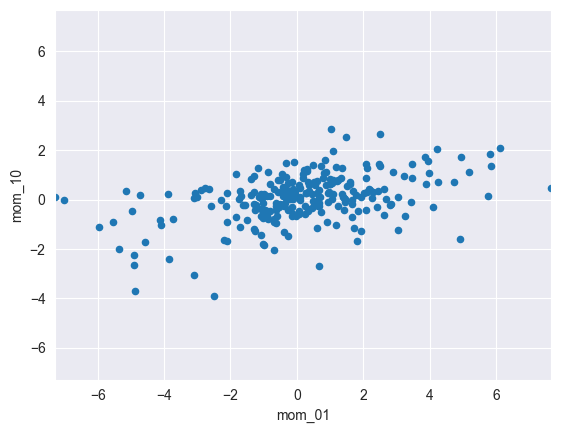

In [13]:
import seaborn

seaborn.set_style("darkgrid")

data = momentum.loc["2016", ["mom_01", "mom_10"]]
ax = data.plot.scatter(x="mom_01", y="mom_10")
limits = data.min().min(), data.max().max()
ax.set_xlim(limits)
ax.set_ylim(limits)
QUESTION_12 = ax.get_figure()

## Question 13

Compute the excess kurtosis of daily, weekly (using Friday and the end of the week) and monthly 
returns on the 10 momentum portfolios using the pandas function `kurt`. The solution must be a
DataFrame with the portfolio names as the index ordered form 1 to 10 and the sampling frequencies,
'daily', 'weekly', or 'monthly' as the columns (in order). When computing weekly or monthly returns
from daily data, use the sum of the daily returns.  

In [14]:
momentum_perc = momentum / 100
QUESTION_13 = pd.DataFrame(
    {
        "daily": momentum_perc.kurt(),
        "weekly": momentum_perc.resample("W-FRI").sum().kurt(),
        "monthly": momentum_perc.resample("M").sum().kurt(),
    }
)

C:\Users\kevin\AppData\Local\Temp\ipykernel_76144\3256143717.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "monthly": momentum_perc.resample("M").sum().kurt(),


## Question 14

Simulate a random walk using 100 normal observations from a
NumPy `RandomState` initialized with a seed of `19991231`.

In [15]:
rs = np.random.RandomState(19991231)
QUESTION_14 = np.cumsum(rs.standard_normal(100))

## Question 15

Defining 

```
import numpy as np

cum_momentum = np.cumprod(1 + momentum / 100)
```

compute the ratio of the high-price to the low price in each month.  The solution
should be a DataFrame where the index is the last date in each month and the columns
are the variables names.
 

In [16]:
import numpy as np

cum_momentum = np.cumprod(1 + momentum / 100)

QUESTION_15 = cum_momentum.resample("M").max() / cum_momentum.resample("M").min()

C:\Users\kevin\AppData\Local\Temp\ipykernel_76144\131835036.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  QUESTION_15 = cum_momentum.resample("M").max() / cum_momentum.resample("M").min()


## Question 16

Simulate 100 observations from the model

$$ y_i = 0.2 + 1.2 y_{i-1} - 0.2 y_{i-2} + \epsilon_i$$

where $\epsilon_i$ is a standard normal shock.  Set $y_0=\epsilon_0$ and
$y_1=\epsilon_0 + \epsilon_1$. The solution should be a 1-d NumPy array with 100 elements. Use
a RandomState with a seed value of 19991231.

In [17]:
rs = np.random.RandomState(19991231)
y = np.zeros(100)
e = rs.standard_normal(100)

y[0] = e[0]
y[1] = e[0] + e[1]
for i in range(2, 100):
    y[i] = 0.2 + 1.2 * y[i - 2] - 0.2 * y[i - 2] + e[i]
QUESTION_16 = y

## Question 17
What is the ratio of the largest eigenvalue to the smallest eigenvalue 
of the correlation matrix of the 10 momentum returns? 

**Note**: This is called the condition number of a matrix and is a measure of
how closely correlated the series are. You can compute the eigenvalues from
the correlation matrix using `np.linalg.eigs`.  See the help of this function
for more details. 

In [18]:
corr = momentum.corr()
eigs = np.linalg.eigvalsh(corr)
QUESTION_17 = eigs.max() / eigs.min()
QUESTION_17

np.float64(124.89972537712194)

## Question 18

Write a function that takes a single input 'x' and return the string
"The value of x is " and the value of x. For example, if x is 3.14,
then the returned value should be "The value of x is 3.14". The function name
must be QUESTION_18.

In [19]:
def QUESTION_18(x):
    return f"The value of x is {x}"

## Question 19

Compute the percentage of days where all 10 returns are positive and subtract the
percentage of days where all 10 momentum returns are negative on the same day.

In [20]:
positive = (momentum > 0).all(1).mean()
negative = (momentum < 0).all(1).mean()
QUESTION_19 = positive - negative

## Question 20

Write the function `QUESTION_20` that will take a single input `s`, which is a string
and will return a Series that counts the number of times each letter in `s` appears in `s`
_without_ regard to case. Do not include spaces.  Ensure the Series returned as its index sorted.

**Hints**:

* Have a look at `value_counts` for a pandas `Series`.
* You can iterate across the letters of a string using

```
some_string = 'abcdefg'
for letter in some_string:
    do somethign with letter...
```
* `str.lower` can be used to get the lower case version of a string

In [21]:
def QUESTION_20(s):
    s = s.lower()
    letters = []
    for letter in s:
        if letter != " ":
            letters.append(letter)
    return pd.Series(letters).value_counts().sort_index()